In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | kahului
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | vangaindrano
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | jinchang
Processing Rec

Processing Record 39 of Set 4 | ilebo
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | farrukhabad
Processing Record 44 of Set 4 | maghama
City not found. Skipping...
Processing Record 45 of Set 4 | sheridan
Processing Record 46 of Set 4 | mitu
Processing Record 47 of Set 4 | ambovombe
Processing Record 48 of Set 4 | kieta
Processing Record 49 of Set 4 | morehead
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | sorvag
City not found. Skipping...
Processing Record 2 of Set 5 | kawalu
Processing Record 3 of Set 5 | ostersund
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | port macquarie
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | sooke
Processing Record 8 of Set 5 | finschhafen
Processing Record 9 of Set 5 | rayong
Processing Record 10 of Set 5 | luba
Processing Record 11 of Set 5 | buraydah
Processing Record 12 of

Processing Record 28 of Set 8 | abu dhabi
Processing Record 29 of Set 8 | miyako
Processing Record 30 of Set 8 | hvide sande
Processing Record 31 of Set 8 | flin flon
Processing Record 32 of Set 8 | ilulissat
Processing Record 33 of Set 8 | prainha
Processing Record 34 of Set 8 | witu
Processing Record 35 of Set 8 | jalor
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | kalat
Processing Record 38 of Set 8 | bhaktapur
Processing Record 39 of Set 8 | poum
Processing Record 40 of Set 8 | daru
Processing Record 41 of Set 8 | saint george
Processing Record 42 of Set 8 | ponta do sol
Processing Record 43 of Set 8 | hualmay
Processing Record 44 of Set 8 | kintinku
Processing Record 45 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 46 of Set 8 | verkhnevilyuysk
Processing Record 47 of Set 8 | garbolovo
Processing Record 48 of Set 8 | imbituba
Processing Record 49 of Set 8 | torit
Processing Record 50 of Set 8 | half moon bay
Processing Record 1 of

Processing Record 17 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 18 of Set 12 | kuito
Processing Record 19 of Set 12 | chumikan
Processing Record 20 of Set 12 | iguape
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | vila do maio
Processing Record 24 of Set 12 | bjornevatn
Processing Record 25 of Set 12 | kargil
Processing Record 26 of Set 12 | harper
Processing Record 27 of Set 12 | seydisehir
Processing Record 28 of Set 12 | bol
Processing Record 29 of Set 12 | sao joao da barra
Processing Record 30 of Set 12 | kamina
Processing Record 31 of Set 12 | matamoros
Processing Record 32 of Set 12 | onguday
Processing Record 33 of Set 12 | gumusyaka
City not found. Skipping...
Processing Record 34 of Set 12 | sampit
Processing Record 35 of Set 12 | karachi
Processing Record 36 of Set 12 | coxim
Processing Record 37 of Set 12 | shelburne
Processing Record 38 of Set 12 | varhaug
Processing Record 39 of

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alofi,-19.0595,-169.9187,69.69,88,40,3.44,NU,2021-10-25 18:52:32
1,Lavrentiya,65.5833,-171.0000,17.13,81,100,10.13,RU,2021-10-25 18:52:33
2,Georgetown,5.4112,100.3354,81.90,85,40,1.99,MY,2021-10-25 18:52:33
3,Jamestown,42.0970,-79.2353,69.12,67,75,10.36,US,2021-10-25 18:51:50
4,Souillac,-20.5167,57.5167,73.78,73,20,11.50,MU,2021-10-25 18:52:33
5,Dikson,73.5069,80.5464,13.82,83,100,18.21,RU,2021-10-25 18:52:34
6,Mar Del Plata,-38.0023,-57.5575,69.82,35,0,15.99,AR,2021-10-25 18:51:48
7,Rikitea,-23.1203,-134.9692,74.86,71,93,18.45,PF,2021-10-25 18:52:34
8,Ushuaia,-54.8000,-68.3000,33.46,86,75,24.16,AR,2021-10-25 18:52:34
9,Atuona,-9.8000,-139.0333,77.43,75,14,14.94,PF,2021-10-25 18:52:35


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-10-25 18:52:32,-19.0595,-169.9187,69.69,88,40,3.44
1,Lavrentiya,RU,2021-10-25 18:52:33,65.5833,-171.0000,17.13,81,100,10.13
2,Georgetown,MY,2021-10-25 18:52:33,5.4112,100.3354,81.90,85,40,1.99
3,Jamestown,US,2021-10-25 18:51:50,42.0970,-79.2353,69.12,67,75,10.36
4,Souillac,MU,2021-10-25 18:52:33,-20.5167,57.5167,73.78,73,20,11.50
5,Dikson,RU,2021-10-25 18:52:34,73.5069,80.5464,13.82,83,100,18.21
6,Mar Del Plata,AR,2021-10-25 18:51:48,-38.0023,-57.5575,69.82,35,0,15.99
7,Rikitea,PF,2021-10-25 18:52:34,-23.1203,-134.9692,74.86,71,93,18.45
8,Ushuaia,AR,2021-10-25 18:52:34,-54.8000,-68.3000,33.46,86,75,24.16
9,Atuona,PF,2021-10-25 18:52:35,-9.8000,-139.0333,77.43,75,14,14.94


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

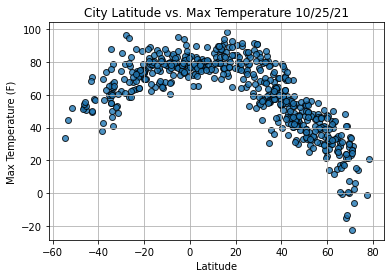

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

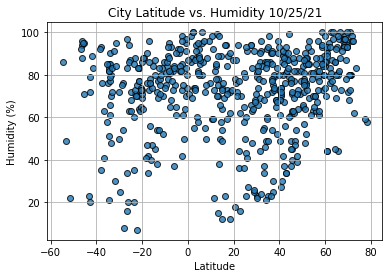

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

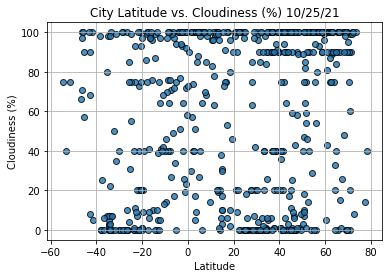

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

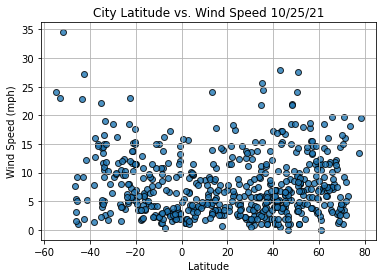

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()